In [23]:
%pip install seaborn
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy



In [48]:
# Load a functional fMRI scan
test1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Test.npy")
test2 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-002_Resp_Test.npy")

train1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Training.npy")

testmat = scipy.io.loadmat("/Users/jenniferarakaki/Documents/neuro120/8275363/AcrossGenre_Order_Test.mat")
rms = scipy.io.loadmat("/Users/jenniferarakaki/Documents/neuro120/8275363/Mean_RMS.mat")



Identify the preprocessing result:

In [ ]:
print(test1.shape)
print(train1.shape)

print(test2.shape)

print(testmat)
testmat['across_genre_rn_test'].shape
print("The structure of the stimulus for all 5 subjects is as follows:")
print("There are 6 runs for each subject, each run has 4 repetitions, and each trial has 10 genres.")
print("")


(60784, 4, 600)
(60784, 4800)
(53927, 4, 600)
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Aug 21 19:42:28 2023', '__version__': '1.0', '__globals__': [], 'across_genre_rn_test': array([[[10,  3,  1,  4,  7,  9,  2,  5,  6,  8],
        [10,  3,  1,  4,  7,  9,  2,  5,  6,  8],
        [10,  3,  1,  4,  7,  9,  2,  5,  6,  8],
        [10,  3,  1,  4,  7,  9,  2,  5,  6,  8]],

       [[ 9, 10,  5,  8,  3,  6,  1,  2,  4,  7],
        [ 9, 10,  5,  8,  3,  6,  1,  2,  4,  7],
        [ 9, 10,  5,  8,  3,  6,  1,  2,  4,  7],
        [ 9, 10,  5,  8,  3,  6,  1,  2,  4,  7]],

       [[ 5,  1, 10,  3,  8,  4,  2,  7,  9,  6],
        [ 5,  1, 10,  3,  8,  4,  2,  7,  9,  6],
        [ 5,  1, 10,  3,  8,  4,  2,  7,  9,  6],
        [ 5,  1, 10,  3,  8,  4,  2,  7,  9,  6]],

       [[ 7,  3, 10,  9,  1,  5,  4,  2,  8,  6],
        [ 7,  3, 10,  9,  1,  5,  4,  2,  8,  6],
        [ 7,  3, 10,  9,  1,  5,  4,  2,  8,  6],
        [ 7,  3, 10,  9,  1,  5,  4, 

In [27]:
import requests
import os


# Output directory
output_dir = "/Users/jenniferarakaki/Documents/neuro120/8275363/labels"
os.makedirs(output_dir, exist_ok=True)

# Download each file
for i in range(5):
    for j in range(6):

        # rename = requests.get(f"https://s3.amazonaws.com/openneuro.org/ds003720/sub-00{i+1}/func/sub-00{i+1}_task-Test_run-0{j+1}_events.tsv")
        # print(rename.text)
        
        url = f"https://s3.amazonaws.com/openneuro.org/ds003720/sub-00{i+1}/func/sub-00{i+1}_task-Test_run-0{j+1}_events.tsv"
        filename = os.path.basename(url.split("/")[-1])
        filepath = os.path.join(output_dir, filename)

        print(f"Downloading {url} → {filepath}")
        response = requests.get(url)

        with open(filepath, "wb") as f:
            f.write(response.content)
        

print("All downloads complete!")



All downloads complete!


Try to visualize a middle slice of an fMRI scan

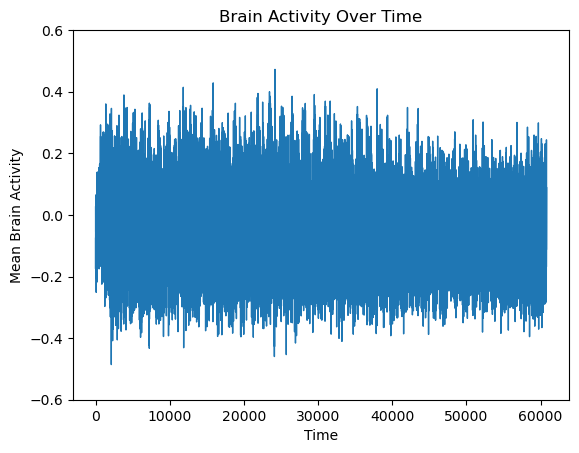

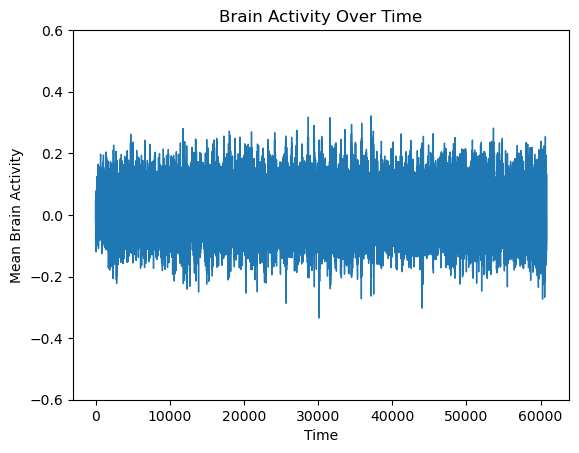

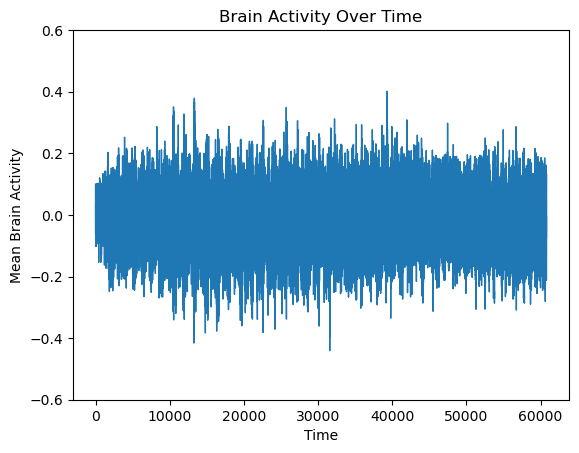

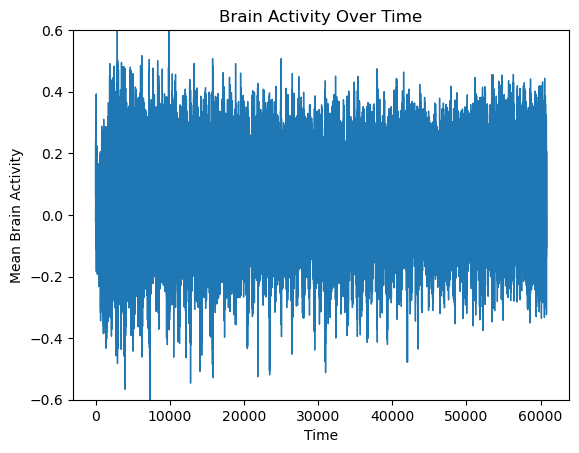

In [28]:
#import ax. module
import matplotlib.pyplot as plt

mean_activity = np.mean(test1[:,0,:], axis=1)  # Average over voxels
plt.plot(mean_activity, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

mean_activity1 = np.mean(test1[:,1,:], axis=1)  # Average over voxels
plt.plot(mean_activity1, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

mean_activity2 = np.mean(test1[:,2,:], axis=1)  # Average over voxels
plt.plot(mean_activity2, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

mean_activity3 = np.mean(test1[:,3,:], axis=1)  # Average over voxels
plt.plot(mean_activity3, linewidth=1
         )
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

Using this activity information, we can use different analysis methods to predict the genres.
i.e a decoding model: classification model
- Logistic regression(HW 1 P2) misnomer! classification
- Support Vector Machine (SVM) classification
- Linear Discriminant Analysis (LDA) classification
- Naive Bayes classifiers classification
- K-Nearest Neighbors (KNN) either classification or regression

Try to load and visualize the training data:

In [29]:
training1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Training.npy")

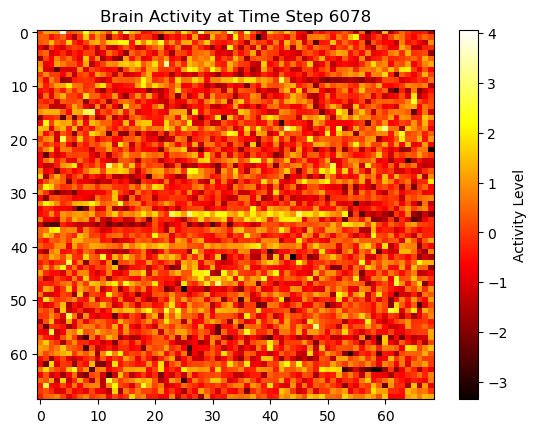

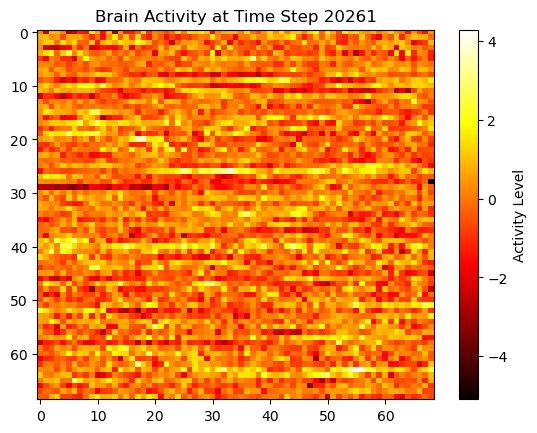

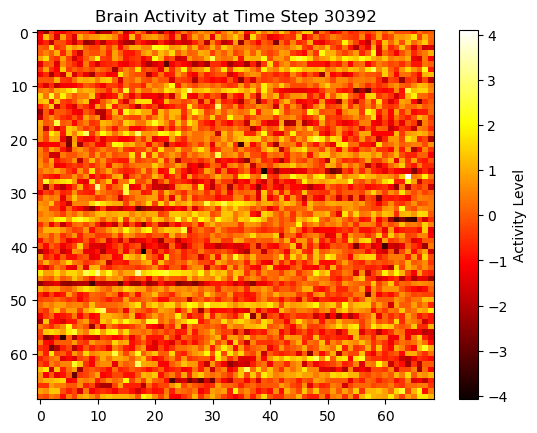

In [30]:
# Select a time step (e.g., middle of the recording)
timestep = training1.shape[0] // 10
voxel_data = training1[timestep, :]  # Get voxel activity at this time step

# Reshape the voxel data into a square-like shape
image_size = int(np.sqrt(4800))  # Find the closest square shape
voxel_image = voxel_data[:image_size**2].reshape(image_size, image_size)  # Reshape

# Plot the 2D representation of brain activity
plt.imshow(voxel_image, cmap="hot", aspect="auto")
plt.colorbar(label="Activity Level")
plt.title(f"Brain Activity at Time Step {timestep}")
plt.show()

# Select a time step (e.g., middle of the recording)
timestep = training1.shape[0] // 3
voxel_data = training1[timestep, :]  # Get voxel activity at this time step

# Reshape the voxel data into a square-like shape
image_size = int(np.sqrt(4800))  # Find the closest square shape
voxel_image = voxel_data[:image_size**2].reshape(image_size, image_size)  # Reshape

# Plot the 2D representation of brain activity
plt.imshow(voxel_image, cmap="hot", aspect="auto")
plt.colorbar(label="Activity Level")
plt.title(f"Brain Activity at Time Step {timestep}")
plt.show()

# Select a time step (e.g., middle of the recording)
timestep = training1.shape[0] // 2
voxel_data = training1[timestep, :]  # Get voxel activity at this time step

# Reshape the voxel data into a square-like shape
image_size = int(np.sqrt(4800))  # Find the closest square shape
voxel_image = voxel_data[:image_size**2].reshape(image_size, image_size)  # Reshape

# Plot the 2D representation of brain activity
plt.imshow(voxel_image, cmap="hot", aspect="auto")
plt.colorbar(label="Activity Level")
plt.title(f"Brain Activity at Time Step {timestep}")
plt.show()


This animation of fmri activity over time is not working, would be cool to debug this tho...

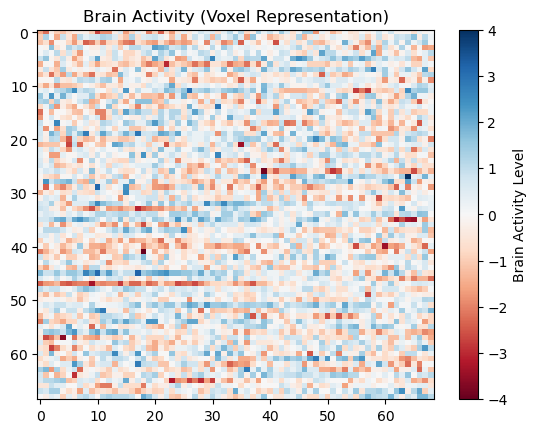

In [31]:
import matplotlib.animation as animation

image_size = int(np.sqrt(4800))

fig, ax = plt.subplots()
cax = ax.imshow(np.zeros((image_size, image_size)), cmap="hot", aspect="auto")

def update(frame):
    voxel_data = fmri_data[frame, :image_size**2].reshape(image_size, image_size)
    voxel_image = (voxel_data - np.min(voxel_data)) / (np.max(voxel_data) - np.min(voxel_data))
    cax.set_array(voxel_image)
    ax.set_title(f"Time Step {frame}")

ani = animation.FuncAnimation(fig, update, frames=100, interval=50)

plt.imshow(voxel_image, cmap="RdBu", aspect="auto", vmin=-4, vmax=4)
plt.colorbar(label="Brain Activity Level")
plt.title("Brain Activity (Voxel Representation)")
plt.show()



Idk if im implementing this PCA right...

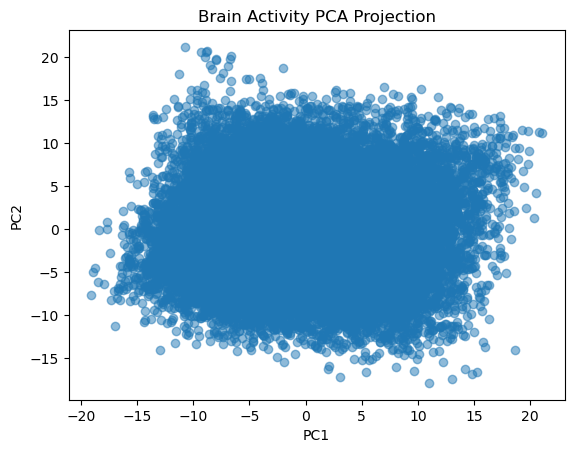

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D
reduced_data = pca.fit_transform(test1[:,0,:])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Brain Activity PCA Projection")
plt.show()

In [33]:
testmean1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Test_Mean.npy")

In [34]:
print(testmean1.shape)
print("There are 60784 time points and each one includes recordings of 600 time points.")

print((testmean1[1,:]).shape)

(60784, 600)
There are 60784 time points and each one includes recordings of 600 time points.
(600,)
